# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/brandmustafa/coffee-sales

Import the necessary libraries and create your dataframe(s).

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Coffee Sales.csv')

In [74]:
#again I looked at the first 5 rows
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,3/1/2024,15:50.5
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,19:22.5
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,20:18.1
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,3/1/2024,46:33.0
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,3/1/2024,48:14.6


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [75]:
#then I looped through each column and calculated the percentage of missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

hour_of_day - 0%
cash_type - 0%
money - 0%
coffee_name - 0%
Time_of_Day - 0%
Weekday - 0%
Month_name - 0%
Weekdaysort - 0%
Monthsort - 0%
Date - 0%
Time - 0%


In [76]:
#again confirmed there were no missing values
df.isna().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

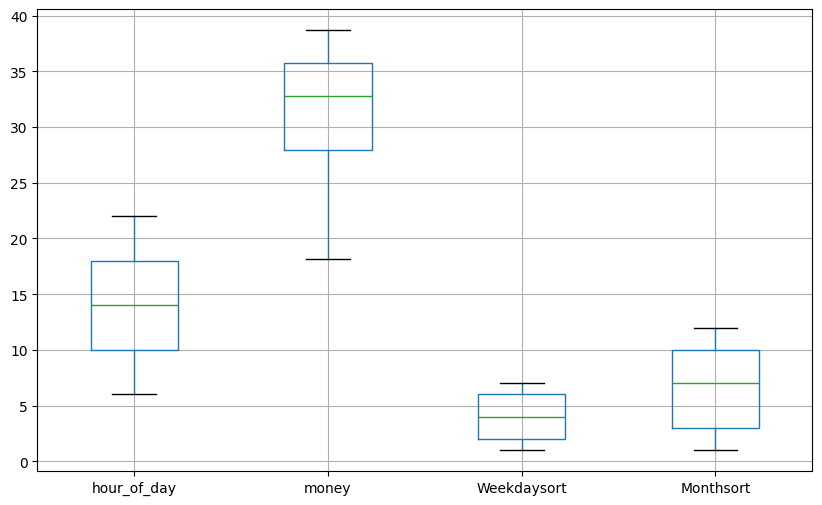

In [ ]:
#I created a boxplot of the numeric columns to look for outliers or unusual values 
plt.figure(figsize=(10,6))
df.select_dtypes(include='number').boxplot()
plt.show()


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [ ]:
#again, checked for duplicated rows
df.duplicated().sum()

np.int64(0)

In [ ]:
#I remembered there being column with one unique value, so looked for that
df.nunique()

hour_of_day      17
cash_type         1
money            13
coffee_name       8
Time_of_Day       3
Weekday           7
Month_name       12
Weekdaysort       7
Monthsort        12
Date            381
Time           3373
dtype: int64

In [ ]:
#then dropped that column
df = df.drop(columns=['cash_type'])

In [ ]:
#Also dropped monthsort and weeksort because I did not feel they were necessary moving forward
df = df.drop(columns=["Monthsort", "Weekdaysort"])

In [ ]:
#One of my main cleaning steps was converting the revenue column to USD, 
#I applied a conversion rate of 0.15 and created a new column. 
#This conversion made the analysis easier to interpret.

rate = 0.15
df["money_usd"] = (df["money"] * rate).round(2)

In [ ]:
#used head to see that my new conversion column was created correctly
df.head()

,hour_of_day,money,coffee_name,Time_of_Day,Weekday,Month_name,Date,Time,money_usd
0,10,38.7,Latte,Morning,Fri,Mar,3/1/2024,15:50.5,5.81
1,12,38.7,Hot Chocolate,Afternoon,Fri,Mar,3/1/2024,19:22.5,5.81
2,12,38.7,Hot Chocolate,Afternoon,Fri,Mar,3/1/2024,20:18.1,5.81
3,13,28.9,Americano,Afternoon,Fri,Mar,3/1/2024,46:33.0,4.34
4,13,38.7,Latte,Afternoon,Fri,Mar,3/1/2024,48:14.6,5.81


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [ ]:
#I remembered from eda that my column names were inconsistent
df.columns

Index(['hour_of_day', 'money', 'coffee_name', 'Time_of_Day', 'Weekday',
       'Month_name', 'Date', 'Time', 'money_usd'],
      dtype='object')

In [ ]:
#I standardized all the column names by stripping extra spaces, 
#converting everything to lowercase, and replacing spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df.columns

Index(['hour_of_day', 'money', 'coffee_name', 'time_of_day', 'weekday',
       'month_name', 'date', 'time', 'money_usd'],
      dtype='object')

In [ ]:
#then checked other oclumns for inconsistencies like incorrect spellings, 
#extra spaces, or formatting differences, to ensure myu visualizations would be correct
df['weekday'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], dtype=object)

In [87]:
df['month_name'].unique()

array(['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec', 'Jan', 'Feb'], dtype=object)

In [88]:
df['coffee_name'].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
     -No, there was no missing data and I do not believe there are any outliers within the data set. 

2. Did the process of cleaning your data give you new insights into your dataset?
     -It was fun to spot some inconsistencies and be able to handle them. The insights I gained are that this seems like a good dataset for a first project.

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
    -Coming up with a flow or checklist for exploring and cleaning date to decide how to manipluate the data was very useful. I did not find myself too overwhemled with remembering to check all the things, when I followed a checklist. 
    -I'm still struggling to wrap my brain around visoulizations. The creative part of my brain doesn't function the way the analytical :) side does. 

In [ ]:
#lastly, exported my cleaned dataframe into a new CSV file that I was able to bring directly to Tableau
df.to_csv('coffee_sales_clean.csv', index=False)